# Prelude

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Observatory Performance Mode

In [243]:
opm = "glao"

# Telemetry

In [244]:
data = pd.read_parquet(f"{opm}-logs.parquet")

In [245]:
data.tail()

,WfeRms,SegmentWfeRms,SegmentPiston,ResidualWfeRms,SegmentResidualWfeRms,SegmentResidualPiston
1995,[1.290079694626911e-06],"[1.3674153933607158e-06, 1.0673845736164367e-0...","[-9.460072760703042e-07, -5.321264211488597e-0...",[7.93453239111841e-07],"[1.544783572171582e-07, 1.7018530229506723e-07...","[-9.423268920727423e-07, -5.066962671662623e-0..."
1996,[1.2902423804916907e-06],"[1.3679288031198666e-06, 1.0675369139789836e-0...","[-9.471150974604825e-07, -5.326565997165744e-0...",[7.936136512398662e-07],"[1.5556140908756788e-07, 1.6975450023437588e-0...","[-9.433621812604542e-07, -5.072000135442067e-0..."
1997,[1.2904030199933914e-06],"[1.3684390296475613e-06, 1.06768379737332e-06,...","[-9.482211567046761e-07, -5.33190927853866e-07...",[7.935229291433643e-07],"[1.5656188168122753e-07, 1.6899846855267242e-0...","[-9.443918429496989e-07, -5.076897764411115e-0..."
1998,[1.2905676385344123e-06],"[1.3689576690012473e-06, 1.0678288617782528e-0...","[-9.4931772309792e-07, -5.337179231901246e-07,...",[7.932000016808161e-07],"[1.5708192790953035e-07, 1.6812296621537826e-0...","[-9.454002452002896e-07, -5.081672043161234e-0..."
1999,[1.2907192967759329e-06],"[1.369471533507749e-06, 1.0679455044737551e-06...","[-9.504293529971619e-07, -5.342549229681026e-0...",[7.925865475044702e-07],"[1.57553031954194e-07, 1.673100200605404e-07, ...","[-9.464101822231896e-07, -5.086441206003656e-0..."


# Last step wavefronts

In [246]:
wavefront = pd.read_parquet(f"{opm}-wavefront.parquet")
wavefront

,Wavefront,ReconWavefront,ResidualWavefront
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


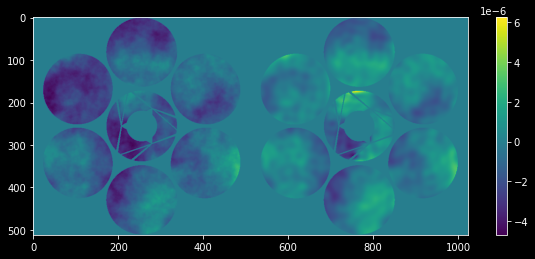

In [247]:
fig, ax = plt.subplots(figsize=(10,4))
h = ax.imshow(np.hstack([np.vstack(wavefront["Wavefront"])[-1].reshape(-1,512),\
                      -np.vstack(wavefront["ReconWavefront"])[-1].reshape(-1, 512)]))
fig.colorbar(h,ax=ax)

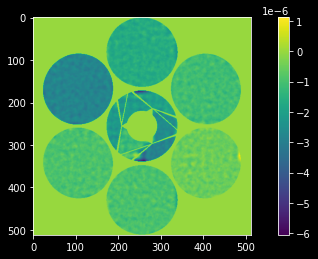

In [248]:
fig, ax = plt.subplots(figsize=(10,4))
h = ax.imshow(np.vstack(wavefront["Wavefront"])[-1].reshape(-1,512)
                      +np.vstack(wavefront["ReconWavefront"])[-1].reshape(-1, 512))
fig.colorbar(h,ax=ax)

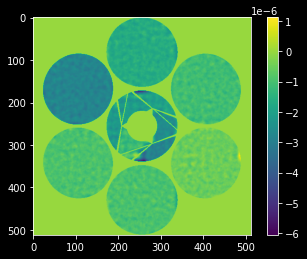

In [249]:
plt.imshow(np.vstack(wavefront["ResidualWavefront"])[-1].reshape(-1,512))
plt.colorbar()


# Wavefront RMS

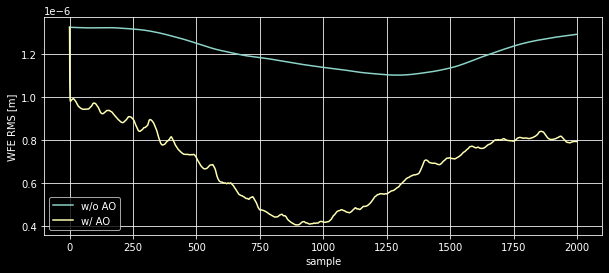

In [250]:
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(np.vstack(data["WfeRms"]),label='w/o AO')
ax.plot(np.vstack(data["ResidualWfeRms"]), label='w/ AO')
ax.grid()
ax.set_xlabel("sample")
ax.set_ylabel("WFE RMS [m]")
ax.legend()


# Segment Wavefront RMS

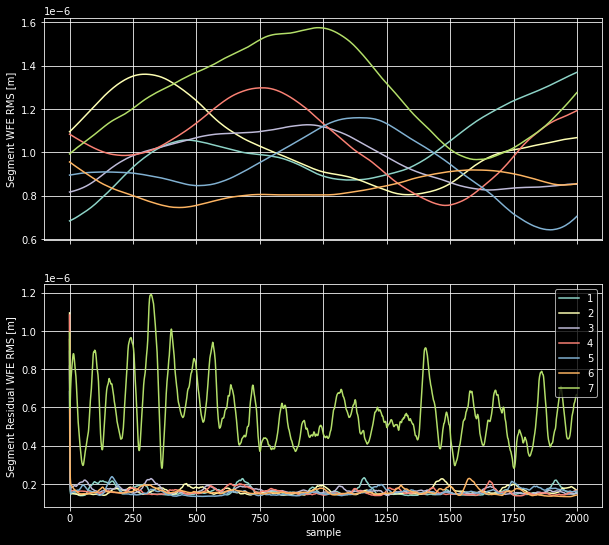

In [251]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(10, 9))
ax = axs[0]
ax.plot(np.vstack(data["SegmentWfeRms"]))
ax.grid()
ax.set_ylabel("Segment WFE RMS [m]")
ax = axs[1]
ax.plot(np.vstack(data["SegmentResidualWfeRms"]))
ax.grid()
ax.set_xlabel("sample")
ax.set_ylabel("Segment Residual WFE RMS [m]")
ax.legend(range(1, 8))


# Segment Piston

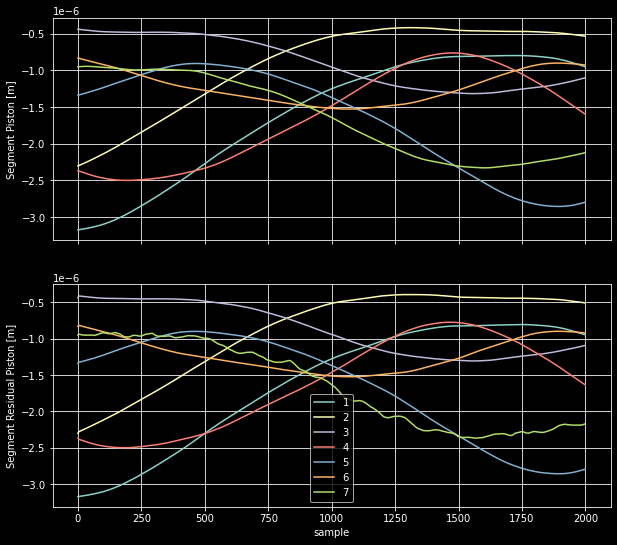

In [252]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(10, 9))
ax = axs[0]
ax.plot(np.vstack(data["SegmentPiston"]))
ax.set_ylabel("Segment Piston [m]")
ax.grid()
ax = axs[1]
ax.plot(np.vstack(data["SegmentResidualPiston"]))
ax.grid()
ax.set_xlabel("sample")
ax.set_ylabel("Segment Residual Piston [m]")
ax.legend(range(1, 8))


# Images

In [253]:
frame = pd.read_parquet(f"{opm}-frame.parquet")
frame

,NaturalSeeingImage,DiffractionLimitedImage
0,"[1365841900.0, 1351942900.0, 2665979100.0, 241...","[1611382900.0, 1529758700.0, 1438368100.0, 108..."


## Natural Seeing image

(-0.5, 0.5)

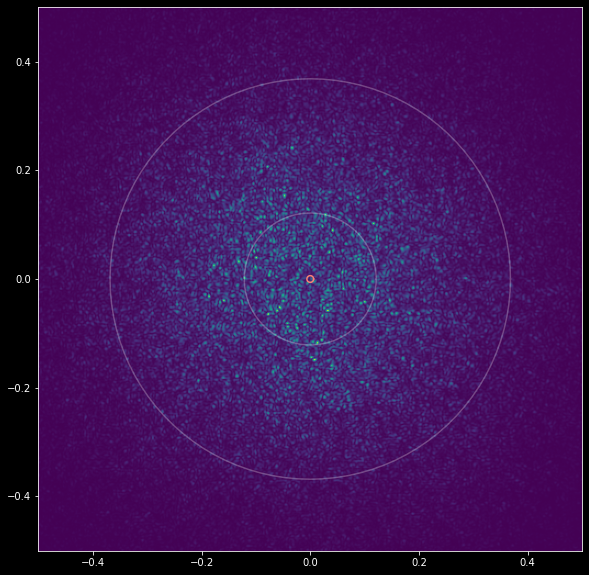

In [254]:
fig,ax = plt.subplots(figsize=(10,10))
px_scale = (180*3600/np.pi) * 0.5*0.5e-6/25.5
h = px_scale * 511/2
o = np.linspace(0, 2*np.pi, 101)
x, y = np.cos(o), np.sin(o)
ax.imshow(np.vstack(frame['NaturalSeeingImage']).reshape(512, -1),extent = [-h, h, -h, h])
r = px_scale * 25.5/8.365
ax.plot(x*r, y*r, 'C3')
r = px_scale * 60
ax.plot(x*r, y*r, 'w', alpha=0.25)
r = px_scale * 25.5/14E-2
ax.plot(x*r, y*r, 'w', alpha=0.25)
lim = np.asarray([-1, 1])*0.5
ax.set_xlim(lim)
ax.set_ylim(lim)


# Adaptive Optics image

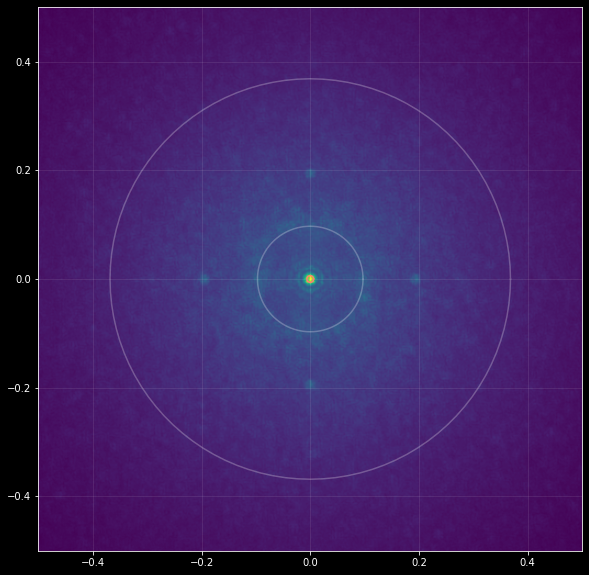

In [255]:
px_scale = (180*3600/np.pi) * 0.5*0.5e-6/25.5
h = px_scale * 511/2
o = np.linspace(0, 2*np.pi, 101)
x, y = np.cos(o), np.sin(o)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.vstack(frame['DiffractionLimitedImage']).reshape(512, -1)**0.25,
          extent=[-h, h, -h, h])
r = px_scale * 25.5/8.365
ax.plot(x*r, y*r, 'C3')
r = px_scale * 48
ax.plot(x*r, y*r, 'w', alpha=0.25)
r = px_scale * 25.5/14E-2
ax.plot(x*r, y*r, 'w', alpha=0.25)
lim = np.asarray([-1, 1])*0.5
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.grid(alpha=0.1)


In [256]:
0.5e-6/(0.25/(180*3600/np.pi))


0.4125296124941927

In [257]:
25.5/60

0.425